# 3.4.1 - K-Means


* En este Notebook vamos a ver el Algoritmo del ***K-Means***, que es un ***Algoritmo de Aprendizaje no Supervisado para Clustering***. Vamos a ***resolver un problema de Clusterización usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Clustering](#M1)
<span></span><br>
    2. [K-Means](#M2)
<span></span><br>
    3. [Pseudocódigo del K-Means](#M3)
<span></span><br>
    4. [Ejemplo sencillo de Clustering](#M4)
<span></span><br>
    5. [Selección del Número óptimo de Clusters](#M5)
    <span></span><br>
        5.1. [Elbow Method](#M51)
<span></span><br>
    6. [Ejemplo Clustering: Segmentación de Clientes en Centros comerciales](#M6)
    <span></span><br>
        6.1. [Carga de datos](#M61)
    <span></span><br>
        6.2. [Cambio de estructura de datos a numpy](#M62)
    <span></span><br>
        6.3. [Visualización de los datos](#M63)
    <span></span><br>
        6.4. [Selección del Número óptimo de Cluster](#M64)
    <span></span><br>
        6.5. [Creacción del modelo y ajuste](#M65)
    <span></span><br>
        6.6. [Obtención del modelo (hipótesis)](#M66)
    <span></span><br>
        6.7. [Conclusiones: Interpretación de los resultados](#M67)

<hr>


## <a name="M1">1. Clustering</a>


* El ***Clustering*** es una ***tarea***; dentro del ***aprendizaje NO SUPERVISADO***, que consiste en ***agrupar un conjunto de objetos (no etiquetados) en subconjuntos de objetos llamados Clusters***.


* ***Cada Cluster está formado por una colección de objetos que son similares (o se consideran similares) entre sí, pero que son distintos respecto a los objetos de otros Clusters***.


<img src="../../imgs/3_04_01_01_cl.png" style="width: 500px;"/>


* Para el ***Clustering, solo disponemos de un conjunto de datos de entrada (aprendizaje NO SUPEERVISADO)***, sobre los que ***debemos obtener información sobre la estructura del dominio de salida***, que es una información de la cual no se dispone.


* En el Clustering definimos:
<span></span><br><br>
    + **<span style="font-size:18px; color:red">Cluster</span>**: Conjunto de objetos que son similares entre sí.
<span></span><br><br>  
    + **<span style="font-size:18px; color:red">Clustering</span>**: Tarea de dividir un conjunto de objetos en subconjuntos de objetos (Clusters) similares entre sí.


<hr>


## <a name="M2">2. K-Means</a>

* El ***K-Means es un método de Clustering que separa <span style="color:red">‘K’ grupos de objetos</span> (Clusters) de similar varianza, minimizando un concepto conocido como inercia.***


<img src="../../imgs/3_04_01_02_cl.png" style="width: 700px;"/>


* La ***Inercia es la suma de las distancias al cuadrado de cada objeto del Cluster a un punto ‘μ’ conocido como <span style="color:red">Centroide</span>*** (punto medio de todos los objetos del Cluster).

    <span style="font-size:20px">$$Inercia = \sum_{i=0}^{N} \left \| x_i - \mu  \right \|^{2}$$</span>


* El algoritmo del K-Means tiene como objetivo ***elegir ‘K’ centroides que reduzcan al mínimo la inercia***:

    <span style="font-size:20px">$$\underset{K}{argmin} \sum_{j=1}^{k}\sum_{x_i \in  c_j}\left \| x_i - \mu  \right \|^{2}$$</span>


<hr>


## <a name="M3">3. Pseudocódigo del K-Means</a>


* El algoritmo del K-Means funciona de la siguiente manera:

    1. ***Inicialización***: Elige un centroide para cada uno de los ‘k’ Cluster. Lo puede elegir bien de forma aleatoria, eligiendo ‘k’ puntos del dataset al azar, etc.
<span></span><br><br>
    2. ***Loop***: Asignación-Actualización hasta converger:
<span></span><br><br>
        * ***Asignación***: Se asigna cada objeto del dataset al Cluster más cercano, aplicando alguna medida de distancia (como por ejemplo la distancia euclídea) entre el objeto y el centroide del Cluster.
<span></span><br><br>
        <span style="font-size:20px">$$d_e(X,\mu ) = \sqrt{\sum_{i=1}^{n} (x_i - \mu_i)^2}$$</span>
<span></span><br><br>
        * ***Actualización***: Calcula los nuevos centroides, haciendo la media de los objetos que forman el Cluster.
<span></span><br><br>
        <span style="font-size:20px">$$\mu = \frac{1}{N} \sum_{j=1}^{N} x_j$$</span>



* Un ejemplo visual de como se haría el Clustering para agrupar elementos definidos por dos variables (coordenadas), sería:

<img src="../../imgs/3_04_01_03_cl.png" style="width: 900px;"/>


<hr>

## <a name="M4">4. Ejemplo sencillo de Clustering</a>


* En este punto vamos a resolver un sencillo problema de Clustering para entender los conceptos de esta Algoritmo de Aprendizaje.


* Para resolver el problema de Clusterización vamos a utilizar la clase **"KMeans()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


* El problema a resolver, va a ser el de agrupar los siguientes puntos definidos por dos variables $X1$ y $X2$ en 'N' grupos (Clusters) cuyos elementos sean similares dentro del mismo grupo pero diferentes de los elementos de los otros grupos. ***Estos 'N' Clusters los encontraremos minimizando la Inercia*** (la suma de las distancias de cada elemento al centroide de su cluster):
<span></span><br><br>
    <span style="font-size:20px">$$\underset{K}{argmin} \sum_{j=1}^{k}\sum_{x_i \in  c_j}\left \| x_i - \mu  \right \|^{2} $$</span>


* Los puntos a Clusterizar serían los siguientes:

[]

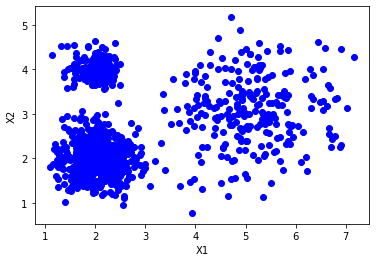

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Leemos los datos
X = np.loadtxt('../../data/DS_3Clusters_999Puntos.txt', delimiter='::')

# Pintamos los elementos
plt.scatter(X[:,0], X[:,1], color='b', marker='o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot()

* Viendo la gráfica, parece que se diferencian 3 grupos de puntos, por lo que vamos a pasar a calcular estos grupos con el Algoritmo de Aprendizaje del K-Means implementado en Scikit.


* Para ello vamos a pasar como parámetros el número de Clusters que queremos calcular que en este caso serán 3:

In [2]:
from sklearn.cluster import KMeans

# Creamos un objeto de la clase "KMeans()"
kmeans = KMeans(n_clusters=3, max_iter=50, init="random", verbose=0)

# Ajustamos el modelo
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=50, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

* Una vez ajustado el modelo vamos a obtener la información de los Clusters:
<span></span><br><br>
    + ***Centroides de los Clusters***
    + ***Número de elementos que hay en cada Cluster***

In [3]:
# Valores de los centroides
centroides = kmeans.cluster_centers_
labels = kmeans.labels_
for index, centroide in enumerate(centroides):
    print("Cluster {}".format(index + 1))
    print("\tCentroide: {}".format(centroide))
    print("\tNº Elementos: {}".format((labels == index).sum()))    

Cluster 1
	Centroide: [2.02022231 4.00032196]
	Nº Elementos: 191
Cluster 2
	Centroide: [5.15350073 3.09247426]
	Nº Elementos: 233
Cluster 3
	Centroide: [2.04429024 1.99783017]
	Nº Elementos: 575


* Por último vamos a visualizar lo siguiente:
    + Como quedarían los puntos en sus respectivos Clusters.
    + Los centroides de los clusters.
    + Las regiones de pertenencia de cada uno de los Clusters en el espacio.

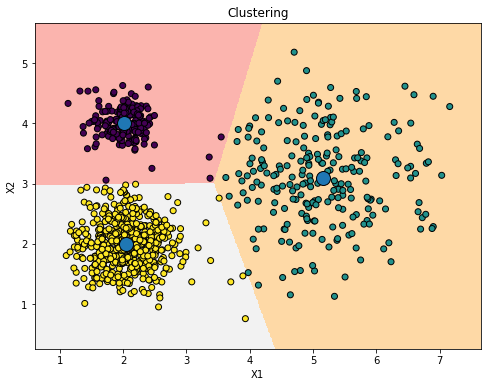

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# Dibujamos los puntos del dataset
labels = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=plt.cm.viridis)

# Dibujamos los Centroides
centroides = kmeans.cluster_centers_
plt.plot(centroides[:, 0], centroides[:, 1], 'o', markeredgecolor='k', markersize=14)

plt.title('Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

<hr>


## <a name="M5">5. Selección del Número óptimo de Clusters</a>


* Uno de los ***problemas*** que nos encontramos a la hora de aplicar alguno de los métodos de Clustering es el de ***seleccionar el número de Clusters***.


* No existe un criterio objetivo ni ampliamente válido para la elección de un número óptimo de Clusters; pero tenemos que tener en cuenta, que una ***mala elección*** de los mismos puede dar lugar a realizar ***agrupaciones de datos muy heterogéneos (pocos Clusters); o datos, que siendo muy similares unos a otros los agrupemos en Clusters diferentes (muchos Clusters)***.


* Una de las técnicas más utilizadas para la selección del número de cluster es el ***“Método del codo” (Elbow Method)***.


* A parte del método del codo, existen otras técnicas para la selección del número óptimo de Clusters como:

    + Criterio de Calinsky
    + Affinity Propagation (AP)
    + El Gap (también con su versión estadística)
    + Dendrogramas
    

<hr>


### <a name="M51">5.1 Elbow Method</a>


* El método del codo utiliza los ***valores de la inercia*** obtenidos tras aplicar el K-means ***a diferente número de Clusters (desde 1 a N Clusters)***.


* Una vez obtenidos los valores de la inercia tras aplicar el K-means de 1 a N Clusters, ***representamos en una gráfica lineal la inercia respecto del número de Clusters***. 


* En esta gráfica ***se debería de apreciar un cambio brusco en la evolución de la inercia***, teniendo la línea representada una forma similar a la de un brazo y su codo.


* ***El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese dataset***; o dicho de otra manera: ***el punto que representaría al codo del brazo*** será el número óptimo de Clusters para ese data set.


* A continuación se van a mostrar dos ejemplos para ver como seleccionar el número óptimo de Clusters. Hay de destacar que estos ejemplos tienen una finalidad didactica y "el codo" se puede apreciar relativamente bien pero ***en problemas reales es más complicado aprecia el cambio brusco de tendencia y por tanto seleccionar el número óptimo de clusters***.


<hr>


### Ejemplo 1:


* Veamos cual sería el número óptimo de clusters para el caso anterior cuyo dataset contiene 999 elementos representados por dos variables X1 y X2:


* Para seleccionar el número optimo de clusters vamos a generar 10 modelos que tendrán de 1 a 10 clusters ya vamos a medir la inercia para cada uno de esos modelos.

In [5]:
import numpy as np
from sklearn.cluster import KMeans

num_modelos = 10

inercia_clusters = list()
for i in range(1, num_modelos + 1, 1):
       
    # Creamos un objeto KMeans
    kmeans = KMeans(n_clusters=i, max_iter=30, init='random')

    # Ajustamos el modelo
    kmeans.fit(X)
    
    # Obtenemos su inercia
    inercia = kmeans.inertia_
    inercia_clusters.append([i, inercia])

* Pintando los resultados de la inercia, podemos observar como se produce un cambio "brusco" de la inercia para 3 Clusters.

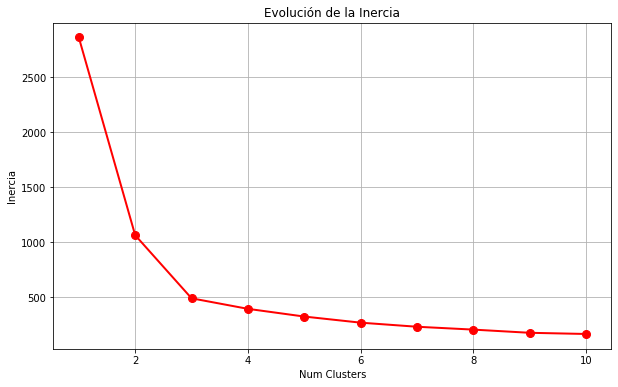

In [6]:
x, y = zip(*[inercia for inercia in inercia_clusters])
fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'ro-', markersize=8, lw=2)
ax.grid(True)
ax.set_title('Evolución de la Inercia')
ax.set_xlabel('Num Clusters')
ax.set_ylabel('Inercia')
plt.show()

<hr>


## <a name="M6">6. Ejemplo Clustering: Segmentación de Clientes en Centros comerciales</a>


* En este punto vamos a resolver un problema de ***Clusterización usando la librería de Scikit-Learn***, que consistirá en ***perfilar a los clientes*** que compran en un centro comercial.


* Para ello disponemos de la siguiente información de los clientes:

    1. ***Gender***: Male|Female
    2. ***Age***: Edad del cliente
    3. ***Annual_Income***: Ingresos anuales del cliente (por miles de dolares)
    4. ***Spending_Score***: Una valoración que va de 0 a 100 en función del número de compras y dinero que gasta el cliente.


* El objetivo de este ejemplo es el de ***agrupar (Clusterizar) a los clientes y sacar el perfíl de estos grupos***, para que posteriormente a clientes de ese perfíl se le puedan aplicar las acciones comerciales correspondientes.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    6.1. [Carga de datos](#M61)
<span></span><br>
    6.2. [Cambio de estructura de datos a numpy](#M62)
<span></span><br>
    6.3. [Visualización de los datos](#M63)
<span></span><br>
    6.4. [Selección del Número óptimo de Cluster](#M64)
<span></span><br>
    6.5. [Creacción del modelo y ajuste](#M65)
<span></span><br>
    6.6. [Obtención del modelo (hipótesis)](#M66)
<span></span><br>
    6.7. [Conclusiones: Interpretación de los resultados](#M67)


<hr>


* En primer lugar vamos a importar las librería necesarias:

In [7]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline 

<hr>


## <a name="M61">6.1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/Mall_Customers.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***CustomerID***
    - ***Gender***
    - ***Age***
    - ***Annual_Income***
    - ***Spending_Score***

In [8]:
df = pd.read_csv("../../data/Mall_Customers.csv")
df.sample(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
58,59,Female,27,46,51
27,28,Male,35,28,61
163,164,Female,31,81,93
122,123,Female,40,69,58
35,36,Female,21,33,81


<hr>


## <a name="M62">6.2. Cambio de estructura de datos a numpy
    
* Vamos a pasar los datos que nos interesan de los clientes a un array de numpy para que nos sirva como entrada al algoritmo de aprendizaje.


* Para este ejercicio nos vamos a quedar con las variables:

    - ***Age***
    - ***Annual_Income***
    - ***Spending_Score***


In [9]:
X = df[['Age', 'Annual_Income', 'Spending_Score']].values

<hr>


## <a name="M63">6.3. Visualización de los datos
    
* Vamos a pasar a ver la relación cada par de variables del Dataset incluido el genero, aunque no lo vayamos a usar en el ejemplo.


* Para poder visualizar el genero, tenemos que transformar las etiquetas a números asigando:
    - 0: Male
    - 1: Female


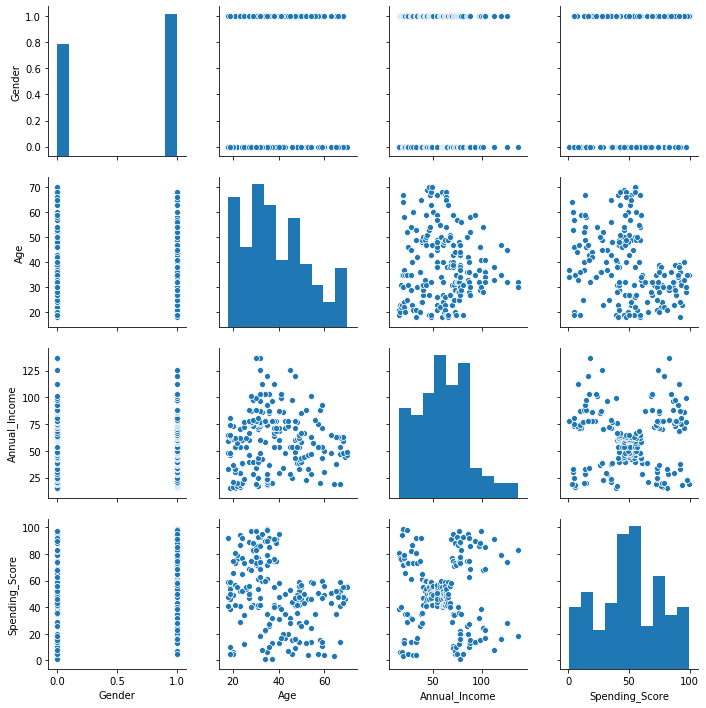

In [10]:
df = df.replace('Male', 0).replace('Female', 1)
sns.pairplot(df[['Gender', 'Age', 'Annual_Income', 'Spending_Score']])

<hr>


## <a name="M64">6.4. Selección del Número óptimo de Clusters
    
    
* Vamos a ver cual sería el número óptimo de Clusters con el método del codo; es decir, representando la inercia por el número de Clusters seleccionados y viendo donde se produce un cambio busco de tendencia.


* Con los resultados obtenidos cuesta ver donde hay un cambio busco de tendencia si son para 4, 5 o 6 Clusters.

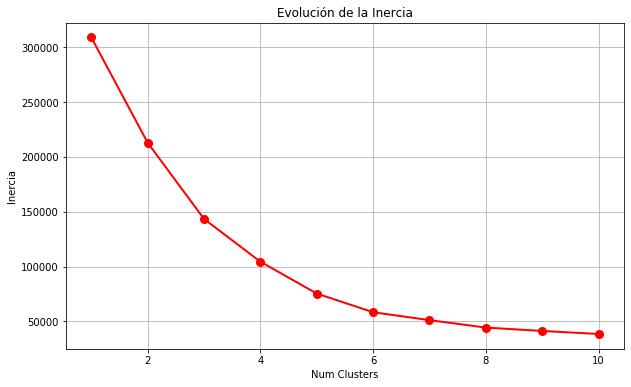

In [11]:
num_modelos = 10

inercia_clusters = list()
for i in range(1, num_modelos + 1, 1):
       
    # Creamos un objeto KMeans
    kmeans = KMeans(n_clusters=i, max_iter=30, init='random')

    # Ajustamos el modelo
    kmeans.fit(X)
    
    # Obtenemos su inercia
    inercia = kmeans.inertia_
    inercia_clusters.append([i, inercia])
    

x, y = zip(*[inercia for inercia in inercia_clusters])
fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'ro-', markersize=8, lw=2)
ax.grid(True)
ax.set_title('Evolución de la Inercia')
ax.set_xlabel('Num Clusters')
ax.set_ylabel('Inercia')
plt.show()

<hr>


## <a name="M65">6.5. Creacción del modelo y ajuste
    
    
* Para crear el modelo vamos a seleccionar 5 Clusters.

In [12]:
# Creamos un objeto de la clase "KMeans()"
np.random.seed(7)
kmeans = KMeans(n_clusters=5, max_iter=50, init="random")

# Ajustamos el modelo
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=50, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

<hr>


## <a name="M66">6.6. Obtención del modelo (hipótesis)


* Tras ajustar el modelo podemos obtener los centroides que representaran el valor medio de cada variable en cada Cluster.

In [13]:
# Valores de los centroides
centroides = kmeans.cluster_centers_
df_centroides = pd.DataFrame(centroides, 
                             columns=['Age', 'Annual_Income', 'Spending_Score'],
                             index=['Cluster {}'.format(index+1) for index, elem in enumerate(centroides)])
df_centroides

,Age,Annual_Income,Spending_Score
Cluster 1,25.272727,25.727273,79.363636
Cluster 2,32.692308,86.538462,82.128205
Cluster 3,40.324324,87.432432,18.189189
Cluster 4,43.126582,54.822785,49.835443
Cluster 5,45.217391,26.304348,20.913043


<hr>


## <a name="M67">6.7. Conclusiones: Interpretación de los resultados
    

* Con los resultados obtenidos podemos concluir:
<span></span><br><br>
    - ***Cluster 1***: Clientes más ***jóvenes*** (25 años de media) con ***ingresos bajos*** (25,7K) y un ***Scoring de compra Alto*** (79%).
<span></span><br><br>
    - ***Cluster 2***: Clientes de ***edad media*** (32,7 años) con ***altos ingresos*** (86,5K) y y un ***Scoring de compra Muy Alto*** (82%).
<span></span><br><br>
    - ***Cluster 3***: Clientes de ***edad media-alta*** (40,3 años) con ***altos ingresos*** (86,5K) y y un ***Scoring de compra Muy Bajo*** (18%).
<span></span><br><br>
    - ***Cluster 4***: Clientes de ***edad alta*** (43,1 años) con ***ingresos medios*** (54,8K) y y un ***Scoring de compra Medio*** (49,8%).
<span></span><br><br>
    - ***Cluster 5***: Clientes con la ***edad más alta*** (45,2 años) con ***ingresos bajos*** (26,3K) y y un ***Scoring de compra Bajo*** (20,9%).
<span></span><br><br>
    
* A modo de resumen podemos ver las distribuciones de cada uno de los Clusters por variable:

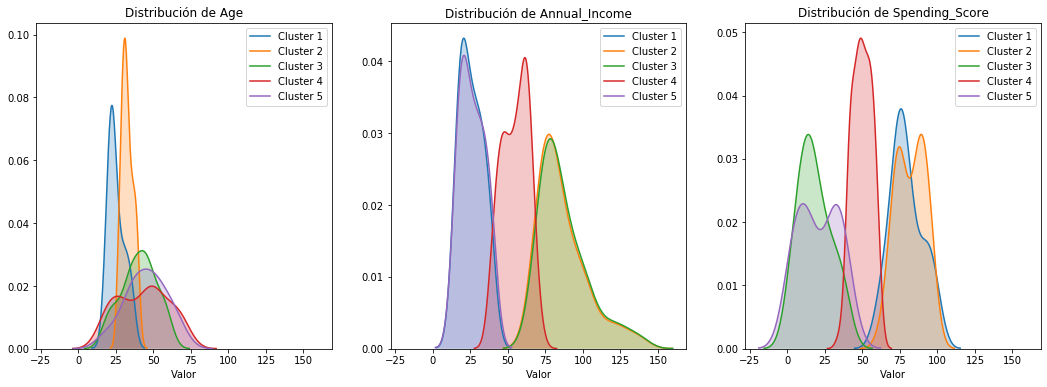

In [14]:
# Obtenemos las etiqueta del cluster a la que se asigna cada elemento
labels = kmeans.labels_


# Añadimos una nueva columna en el DataFrame para indicar la etiqueta de cada elemento
df['label'] = labels
df['label'] = df['label'].apply(lambda x: 'Cluster {}'.format(x+1))


# Dibujamos las distribuciones de las 4 variables para cada uno de los Clusters
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
plt_position = [axes[0], axes[1], axes[2]]
for index, col in enumerate(df[['Age', 'Annual_Income', 'Spending_Score']]):
    for i in np.sort(df['label'].unique()):
        df_plot = df[df['label'] == i][['label', col]] 
        sns.kdeplot(df_plot[col], shade=True, label=i, ax=plt_position[index])
    plt_position[index].title.set_text('Distribución de {}'.format(col))
    plt_position[index].set_xlabel('Valor')

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">